## Aufteilung von mänlichen und weiblichen Texte

In [30]:
import os
import requests
import xml.etree.ElementTree as ET
from bs4 import BeautifulSoup
from lxml import etree

# Funktion zum Herausfinden des Geschlechtes
def get_gender_from_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        content = response.text
        soup = BeautifulSoup(content, 'xml.parser') #html.parser

        table = soup.find('table', {'id': 'fullRecordTable'})
        gender_element1 = table.select('tr:nth-of-type(4) td:nth-of-type(2)')
        gender_element2 = table.select('tr:nth-of-type(5) td:nth-of-type(2)')

        if "männlich" in str(gender_element1) or "männlich" in str(gender_element2):
            return "männlich"
        elif "weiblich" in str(gender_element1) or "weiblich" in str(gender_element2):
            return "weiblich"
    return None

#input und output
corpus_directory = r"/Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13"
output_directory = r"/Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output"

male_folder = os.path.join(output_directory, "männlich")
female_folder = os.path.join(output_directory, "weiblich")
os.makedirs(male_folder, exist_ok=True)
os.makedirs(female_folder, exist_ok=True)

for filename in os.listdir(corpus_directory):
    if filename.endswith(".xml"):
        file_path = os.path.join(corpus_directory, filename)

        with open(file_path, 'rb') as file:
            xml_content = file.read()

        tree = etree.fromstring(xml_content)

        namespaces = {'m': 'http://www.tei-c.org/ns/1.0'}
        persName_elements = tree.xpath('//m:author/m:persName', namespaces=namespaces)
        ref_values = set([persName.get('ref') for persName in persName_elements])

        if ref_values:
            author_url = next(iter(ref_values))
            if author_url:
                gender = get_gender_from_url(author_url)

                if gender:
                    if gender == "männlich":
                        destination_folder = male_folder
                    elif gender == "weiblich":
                        destination_folder = female_folder

                    destination_path = os.path.join(destination_folder, filename)
                    os.rename(file_path, destination_path)
                    print(f"Datei: {filename}, Geschlecht: {gender}, Zielordner: {destination_folder}")
                else:
                    print(f"Datei: {filename}, keine gültige URL für Geschlecht.")
        else:
            print(f"Datei: {filename}, kein 'ref'-Attribut in 'persName' gefunden.")

print("Dateien wurden in die entsprechenden Ordner verschoben.")

Datei: nettelbeck_lebensbeschreibung03_1823.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: wallenrodt_fritz01_1800.TEI-P5.xml, keine gültige URL für Geschlecht.
Datei: kleist_kaethchen_1810.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: pocci_komoedienbuechlein06_1877.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: abschatz_gedichte_1704.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: hunold_gedichte_1702.TEI-P5.xml, Geschlecht: männlich,

Datei: froelich_virginia01_1820.TEI-P5.xml, keine gültige URL für Geschlecht.
Datei: fouque_undine_1811.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: rost_schaefererzaelungen_1742.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: wolff_ausverkauf_1824.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: buechner_werke_1879.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: goethe_torquato_1790.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/st

Datei: ebers_koenigstochter02_1864.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: laukhard_leben03_1796.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: alexis_ruhe03_1852.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: schnabel_fata03_1739.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: kosegarten_poesieen01_1798.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta

Datei: paul_hesperus03_1795.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: varnhagen_rahel03_1834.TEI-P5.xml, Geschlecht: weiblich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/weiblich
Datei: grillparzer_diener_1830.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: gellert_leben01_1747.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: zesen_rosemund_1645.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkor

Datei: schnitzler_liebelei_1896.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: hoelty_gedichte_1783.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: schoch_comoedia_1658.TEI-P5.xml, keine gültige URL für Geschlecht.
Datei: lewald_jenny01_1843.TEI-P5.xml, Geschlecht: weiblich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/weiblich
Datei: holz_buch_1886.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: alexis_ruhe02_1852.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni

Datei: arnimb_goethe01_1835.TEI-P5.xml, Geschlecht: weiblich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/weiblich
Datei: rueckert_brahmane03_1837.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: kleist_fruehling_1749.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: hippel_lebenslaeufe02_1779.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: laroche_geschichte02_1771.TEI-P5.xml, Geschlecht: weiblich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth

Datei: ludwig_erbfoerster_1853.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: goethe_wahlverw01_1809.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: heine_reisebilder02_1827.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: fontane_wuthenow_1883.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: wieland_agathon01_1766.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta

Datei: raabe_akten_1896.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: gottsched_pietisterey_1736.TEI-P5.xml, Geschlecht: weiblich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/weiblich
Datei: goethe_lehrjahre02_1795.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: richardson_clarissa05_1750.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: laukhard_leben01_1792.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta

Datei: novalis_ofterdingen_1802.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: platen_gedichte_1828.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: klopstock_messias01_1751.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: waiblinger_phaeton01_1823.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: kliphausen_helikon_1689.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth

Datei: grillparzer_sappho_1819.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: george_algabal_1892.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: schlegel_lucinde_1799.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: voss_ini_1810.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: lessing_fabeln_1759.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belle

Datei: dronke_polizeigeschichten_1846.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: paul_loge01_1793.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: droste_letzte_1860.TEI-P5.xml, Geschlecht: weiblich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/weiblich
Datei: boerne_paris06_1834.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: rollenhagen_reysen_1603.TEI-P5.xml, keine gültige URL für Geschlecht.
Datei: holz_phantasus01_1898.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1

Datei: hoffmannswaldau_gedichte01_1695.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: ebeling_betrachtungen04_1747.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: hoelderlin_gedichte_1826.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: schirmer_rosengepuesche_1653.TEI-P5.xml, keine gültige URL für Geschlecht.
Datei: schoppe_prophet01_1846.TEI-P5.xml, Geschlecht: weiblich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/weiblich
Datei: kotzebue_menschenhass_1790.TEI-P5.xml, Geschlecht: män

Datei: vischer_auch02_1879.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: lasswitz_planeten01_1897.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: rabener_sammlung02_1751.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: kurz_sonnenwirth_1855.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: bismarck_erinnerungen02_1898.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/

Datei: spiess_biographien03_1796.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: lessing_minna_1767.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: lenau_gedichte_1832.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: moltke_zustaende_1841.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich
Datei: moritz_reiser03_1786.TEI-P5.xml, Geschlecht: männlich, Zielordner: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorp

### Kurze Visualisierung der ungleichmäßigen Verteilung der Daten in der ersten Korpus-Variante:

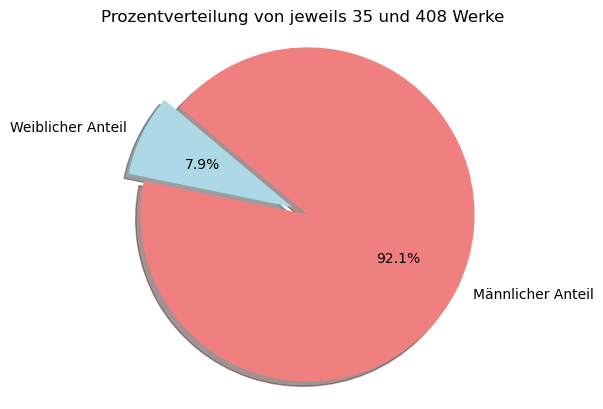

In [132]:
import matplotlib.pyplot as plt

def prozent_verteilung(a, b):
    gesamt = a + b
    prozent_a = (a / gesamt) * 100
    prozent_b = (b / gesamt) * 100
    return prozent_a, prozent_b

a = 35
b = 408

prozent_a, prozent_b = prozent_verteilung(a, b)

# Daten für das Kreisdiagramm
labels = [f'Weiblicher Anteil', f'Männlicher Anteil']
sizes = [prozent_a, prozent_b]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice for emphasis

# Kreisdiagramm erstellen
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Prozentverteilung von jeweils 35 und 408 Werke')
plt.show()

### Untersuchung der weiblichen Texte nach Städte der Publikationen

Die Duplikate hier sind nicht shlimm, da diese Informationen für Mensch trotzdem klar sind

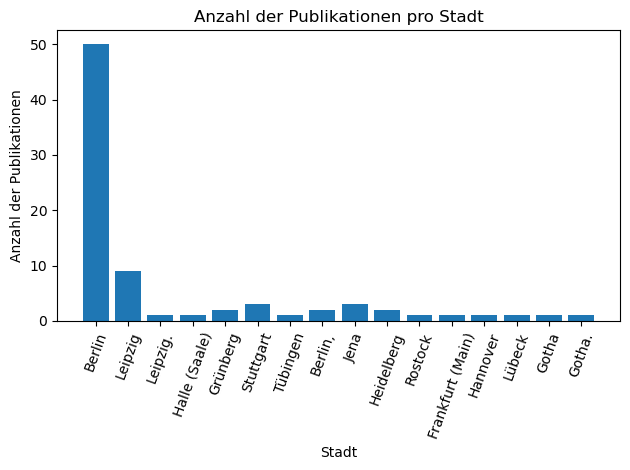

In [74]:
import xml.etree.ElementTree as ET
import os
from collections import Counter
import matplotlib.pyplot as plt

path_to_tei_folder = '/Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/weiblich'

pub_places = []

for filename in os.listdir(path_to_tei_folder):
    if filename.endswith(".xml"):
        tree = ET.parse(os.path.join(path_to_tei_folder, filename))
        root = tree.getroot()
        for pubPlace in root.findall('.//{http://www.tei-c.org/ns/1.0}pubPlace'):
            if pubPlace.text and pubPlace.text.strip():  # Dieser Check stellt sicher, dass der Wert nicht None oder nur Whitespace ist
                pub_places.append(pubPlace.text.strip())


place_counts = Counter(pub_places)


places = list(place_counts.keys())
counts = list(place_counts.values())

plt.bar(places, counts)
plt.xlabel('Stadt')
plt.ylabel('Anzahl der Publikationen')
plt.title('Anzahl der Publikationen pro Stadt')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

Liste der top fünf populärsten Städte:

In [75]:
allowed_places = ["Berlin", "Leipzig", "Stuttgart", "Jena", "Heidelberg"]

## Anpassung des Korpus: männliche Texte zu einer Population

In [76]:
import os

input_directory = "/Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich"
output_directory = "/Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected"
os.makedirs(output_directory, exist_ok=True)
namespaces = {'tei': 'http://www.tei-c.org/ns/1.0'}



for filename in os.listdir(input_directory):
    if filename.endswith(".xml"):
        file_path = os.path.join(input_directory, filename)

        with open(file_path, 'rb') as file:
            xml_content = file.read()

        tree = etree.fromstring(xml_content)

        # Informationen zu Veröffentlichungsort und Datum extrahieren
        pub_place_elements = tree.xpath('//tei:fileDesc/tei:sourceDesc/tei:biblFull/tei:publicationStmt/tei:pubPlace', namespaces=namespaces)
        if pub_place_elements:
            pub_place = pub_place_elements[0].text

        pub_year = int(filename.split("_")[-1].split(".")[0])

        if 1771 <= pub_year <= 1898 and pub_place in allowed_places:
            selected_path = os.path.join(output_directory, filename)
            os.rename(file_path, selected_path)
            print(f"Datei: {filename}, erfüllt die Kriterien, verschoben nach: {output_directory}")
        else:
            print(f"Datei: {filename}, erfüllt die Kriterien für das Jahr nicht.")

print("Dateien, die den Kriterien entsprechen, wurden in den ausgewählten Ordner verschoben.")

Datei: pocci_komoedienbuechlein06_1877.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: abschatz_gedichte_1704.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: hunold_gedichte_1702.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: gutzkow_charaktere_1835.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: pocci_komoedienbuechlein01_1859.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: wagner_kindermoerderin_1776.TEI-P5.xml, erfüllt die Kriterien, verschoben nach: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected
Datei: laube_europa03_1837.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: eichendorff_ahnung_1815.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: goethe_leben02_1812.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: goethe_werther01_1774.TEI-P5.xml, erfüllt die Kriterien, verschoben nach: 

Datei: braeker_lebensgeschichte_1789.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: gryphius_horribilicribrifax_1663.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: richardson_clarissa08_1753.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: sagittarius_carlstuart_1671.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: schulz_reise0102_1795.TEI-P5.xml, erfüllt die Kriterien, verschoben nach: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected
Datei: ebers_koenigstochter03_1864.TEI-P5.xml, erfüllt die Kriterien, verschoben nach: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected
Datei: gryphius_rechtsgelehrter_1659.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: bohse_helicon_1696.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Dat

Datei: keller_sinngedicht_1882.TEI-P5.xml, erfüllt die Kriterien, verschoben nach: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected
Datei: keller_heinrich01_1854.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: tieck_sternbald02_1798.TEI-P5.xml, erfüllt die Kriterien, verschoben nach: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected
Datei: thuemmel_wilhelmine_1764.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: moerike_mozart_1856.TEI-P5.xml, erfüllt die Kriterien, verschoben nach: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected
Datei: bodmer_sammlung06_1742.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: hoffmannswaldau_gedichte06_1709.TEI-P5.xml, erfüllt

Datei: fontane_brandenburg03_1873.TEI-P5.xml, erfüllt die Kriterien, verschoben nach: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected
Datei: heine_lieder_1827.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: weckherlin_oden01_1618.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: boerne_paris02_1832.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: maro_abriss_1668.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: bodmer_sammlung03_1742.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: gotter_erbschleicher_1789.TEI-P5.xml, erfüllt die Kriterien, verschoben nach: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected
Datei: kleist_amphytrion_1807.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: ludwig_himmel_1856.TEI-P5.xml, erfül

Datei: laukhard_leben0401_1797.TEI-P5.xml, erfüllt die Kriterien, verschoben nach: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected
Datei: keller_heinrich02_1854.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: brockes_vergnuegen03_1730.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: neumark_lustwaeldchen_1652.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: chamisso_schlemihl_1814.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: goethe_lehrjahre04_1796.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: polenz_buettnerbauer_1895.TEI-P5.xml, erfüllt die Kriterien, verschoben nach: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected
Datei: bodmer_sammlung05_1742.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: reuter_femme_169

Datei: zesen_assenat_1670.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: pueckler_briefe02_1830.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: pocci_komoedienbuechlein02_1861.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: spielhagen_problematische03_1861.TEI-P5.xml, erfüllt die Kriterien, verschoben nach: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected
Datei: freiligrath_caira_1846.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: beer_antonius_1697.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: paul_hesperus01_1795.TEI-P5.xml, erfüllt die Kriterien, verschoben nach: /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected
Datei: bohse_helicon01_1703.TEI-P5.xml, erfüllt die Kriterien für das Jahr nicht.
Datei: storm_immensee_1852.TE

## Random Sampling für gleichmäßige Stichprobengröße

In [77]:
import random
import os
import shutil

# Verzeichnispfade definieren
male_texts_path = "/Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected"
sampled_texts_path = "/Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected/male_stich"

# Liste aller männlichen Textdateien erstellen
all_male_texts = [f for f in os.listdir(male_texts_path) if f.endswith('.xml')]

# Zufällige Auswahl von 35 Texten
sampled_texts = random.sample(all_male_texts, 35)

# Die ausgewählten Texte in ein neues Verzeichnis verschieben/kopieren
for text in sampled_texts:
    shutil.copy(os.path.join(male_texts_path, text), sampled_texts_path)


## .xml Dateien in .txt umwandeln

**Männlich**

In [79]:
import os
import re
from xml.etree import ElementTree as ET

input_directory = "/Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected/male_stich"
output_directory = "/Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected/male_stich/maleTXT"


def extract_text(element):
    return ' '.join(element.itertext())


def remove_unwanted_tags(text):
    # Unerwünschte Tags und Inhalte entfernen
    text = re.sub(r'<fw.*?>.*?</fw>', '', text)  # Entfernt <fw>...</fw> Tags
    return text

# Durchsuche das Eingangsverzeichnis nach XML-Dateien
for filename in os.listdir(input_directory):
    if filename.endswith(".xml"):
        input_path = os.path.join(input_directory, filename)
        output_path = os.path.join(output_directory, f"{os.path.splitext(filename)[0]}.txt")

        # XML-Datei parsen
        tree = ET.parse(input_path)
        root = tree.getroot()

        # Text im <body>-Tag extrahieren
        body_element = root.find(".//{http://www.tei-c.org/ns/1.0}body")
        if body_element is not None:
            extracted_text = extract_text(body_element)
        else:
            extracted_text = ""

        # Unerwünschte Tags und Inhalte entfernen
        cleaned_text = remove_unwanted_tags(extracted_text)

        # Seitenzahlen im Text entfernen
        cleaned_text = re.sub(r'—\s*\d+\s*—', '', cleaned_text)

        # Bereinigten Text in eine TXT-Datei speichern
        with open(output_path, "w", encoding="utf-8") as txt_file:
            txt_file.write(cleaned_text)

        print(f"Datei {filename} wurde verarbeitet und als {output_path} gespeichert.")

Datei goethe_torquato_1790.TEI-P5.xml wurde verarbeitet und als /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected/male_stich/maleTXT/goethe_torquato_1790.TEI-P5.txt gespeichert.
Datei alexis_ruhe04_1852.TEI-P5.xml wurde verarbeitet und als /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected/male_stich/maleTXT/alexis_ruhe04_1852.TEI-P5.txt gespeichert.
Datei schulz_reise0202_1795.TEI-P5.xml wurde verarbeitet und als /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected/male_stich/maleTXT/schulz_reise0202_1795.TEI-P5.txt gespeichert.
Datei ebers_koenigstochter02_1864.TEI-P5.xml wurde verarbeitet und als /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletris

Datei bismarck_erinnerungen02_1898.TEI-P5.xml wurde verarbeitet und als /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected/male_stich/maleTXT/bismarck_erinnerungen02_1898.TEI-P5.txt gespeichert.
Datei storm_immensee_1852.TEI-P5.xml wurde verarbeitet und als /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected/male_stich/maleTXT/storm_immensee_1852.TEI-P5.txt gespeichert.


**Weiblich**

In [43]:
import os
import re
from xml.etree import ElementTree as ET

input_directory = "/Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/weiblich"
output_directory = "/Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/weiblich/weibTXT"

# Funktion zum Extrahieren von Text aus einem Element
def extract_text(element):
    return ' '.join(element.itertext())

# Funktion zum Entfernen der unerwünschten Tags und Inhalte
def remove_unwanted_tags(text):
    # Unerwünschte Tags und Inhalte entfernen
    text = re.sub(r'<fw.*?>.*?</fw>', '', text)  # Entfernt <fw>...</fw> Tags
    return text

# Durchsuche das Eingangsverzeichnis nach XML-Dateien
for filename in os.listdir(input_directory):
    if filename.endswith(".xml"):
        input_path = os.path.join(input_directory, filename)
        output_path = os.path.join(output_directory, f"{os.path.splitext(filename)[0]}.txt")

        # XML-Datei parsen
        tree = ET.parse(input_path)
        root = tree.getroot()

        # Text im <body>-Tag extrahieren
        body_element = root.find(".//{http://www.tei-c.org/ns/1.0}body")
        if body_element is not None:
            extracted_text = extract_text(body_element)
        else:
            extracted_text = ""

        # Unerwünschte Tags und Inhalte entfernen
        cleaned_text = remove_unwanted_tags(extracted_text)

        # Seitenzahlen im Text entfernen
        cleaned_text = re.sub(r'—\s*\d+\s*—', '', cleaned_text)

        # Bereinigten Text in eine TXT-Datei speichern
        with open(output_path, "w", encoding="utf-8") as txt_file:
            txt_file.write(cleaned_text)

        print(f"Datei {filename} wurde verarbeitet und als {output_path} gespeichert.")

Datei otto_bauernsohn_1849.TEI-P5.xml wurde verarbeitet und als /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/weiblich/weibTXT/otto_bauernsohn_1849.TEI-P5.txt gespeichert.
Datei nathusius_kammerjungfer_1851.TEI-P5.xml wurde verarbeitet und als /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/weiblich/weibTXT/nathusius_kammerjungfer_1851.TEI-P5.txt gespeichert.
Datei arnimb_guenderode02_1840.TEI-P5.xml wurde verarbeitet und als /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/weiblich/weibTXT/arnimb_guenderode02_1840.TEI-P5.txt gespeichert.
Datei droste_gedichte_1844.TEI-P5.xml wurde verarbeitet und als /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/weiblich/weibTXT/droste_gedichte_1

Datei spyri_heidi_1880.TEI-P5.xml wurde verarbeitet und als /Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/weiblich/weibTXT/spyri_heidi_1880.TEI-P5.txt gespeichert.


---

In [133]:
import os
import spacy
import re
import pandas as pd
from nltk import ngrams
from collections import Counter

Verzeichnis mit männlichen Werke

In [98]:
directory_path = '/Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/männlich/male_selected/male_stich/maleTXT'

## Extraktion der Features

### TTR

In [102]:
def calculate_ttr(directory_path):
    ttr_values = {}

    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):
            with open(os.path.join(directory_path, filename), 'r', encoding="utf-8") as file:
                text = file.read().lower()  # Convert text to lowercase
                # Simple tokenization. Consider using more advanced methods for historical texts.
                words = re.findall(r'\b\w+\b', text)
                types = set(words)
                ttr = len(types) / len(words) if words else 0
                ttr_values[filename] = ttr

    return ttr_values

ttr_results = calculate_ttr(directory_path)

# To store the results in a dataframe

df_TTR = pd.DataFrame(list(ttr_results.items()), columns=['Filename', 'TTR'])
print(df_TTR)


                                           Filename       TTR
0             fontane_brandenburg04_1882.TEI-P5.txt  0.160017
1            ebers_koenigstochter03_1864.TEI-P5.txt  0.175654
2             fontane_brandenburg01_1862.TEI-P5.txt  0.158137
3             hippel_lebenslaeufe02_1779.TEI-P5.txt  0.109406
4                  goethe_iphigenie_1787.TEI-P5.txt  0.234475
5              raabe_sperlingsgasse_1857.TEI-P5.txt  0.196035
6           hippel_lebenslaeufe0302_1781.TEI-P5.txt  0.116481
7                    schulz_reise03_1795.TEI-P5.txt  0.147099
8                  fontane_wuthenow_1883.TEI-P5.txt  0.197499
9                    meyer_jenatsch_1876.TEI-P5.txt  0.201938
10               keller_sinngedicht_1882.TEI-P5.txt  0.161543
11                      raabe_akten_1896.TEI-P5.txt  0.149417
12                  bierbaum_stilpe_1897.TEI-P5.txt  0.190548
13        stolbergstolberg_gedichte_1779.TEI-P5.txt  0.243671
14                    alexis_ruhe04_1852.TEI-P5.txt  0.167716
15      

### Durchschnittliche Satzlänge

In [103]:
def avg_sentence_length(directory_path):
    sentence_lengths = {}
    
    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):
            with open(os.path.join(directory_path, filename), 'r', encoding="utf-8") as file:
                text = file.read()
                sentences = re.split(r'[.!?]', text)
                total_words = sum(len(re.findall(r'\b\w+\b', s)) for s in sentences)
                avg_length = total_words / len(sentences) if sentences else 0
                sentence_lengths[filename] = avg_length

    return sentence_lengths

avg_sentence_results = avg_sentence_length(directory_path)

import pandas as pd
df_AVG = pd.DataFrame(list(avg_sentence_results.items()), columns=['Filename', 'Durchschn. Satzlänge'])
print(df_AVG)

                                           Filename  Durchschn. Satzlänge
0             fontane_brandenburg04_1882.TEI-P5.txt             17.641111
1            ebers_koenigstochter03_1864.TEI-P5.txt             18.519517
2             fontane_brandenburg01_1862.TEI-P5.txt             21.328399
3             hippel_lebenslaeufe02_1779.TEI-P5.txt             14.230201
4                  goethe_iphigenie_1787.TEI-P5.txt             10.772195
5              raabe_sperlingsgasse_1857.TEI-P5.txt             16.091382
6           hippel_lebenslaeufe0302_1781.TEI-P5.txt             14.638531
7                    schulz_reise03_1795.TEI-P5.txt             25.145653
8                  fontane_wuthenow_1883.TEI-P5.txt             14.880000
9                    meyer_jenatsch_1876.TEI-P5.txt             18.579790
10               keller_sinngedicht_1882.TEI-P5.txt             26.311514
11                      raabe_akten_1896.TEI-P5.txt             21.860538
12                  bierbaum_stilpe_18

### Modalverben

In [106]:

modal_verbs_list = [
    "können", "kann", "konnte", "könnte", "könntest", "könnten",
    "müssen", "muss", "musste", "müsste", "müsstest", "müssten",
    "dürfen", "darf", "durfte", "dürfte", "dürftest", "dürften",
    "wollen", "will", "wollte", "wolltest", "wollten",
    "sollen", "soll", "sollte", "solltest", "sollten",
    "mögen", "mag", "mochte", "möchte", "möchtest", "möchten"
]

def count_modal_verbs(directory_path):
    modal_counts = {}

    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):
            with open(os.path.join(directory_path, filename), 'r', encoding="utf-8") as file:
                text = file.read().lower()
                words = re.findall(r'\b\w+\b', text)
                modal_counter = Counter(w for w in words if w in modal_verbs_list)
                modal_counts[filename] = dict(modal_counter)

    return modal_counts

modal_verbs_results = count_modal_verbs(directory_path)

df_MOD = pd.DataFrame(list(modal_verbs_results.items()), columns=['Filename', 'Modalverben'])
print(df_MOD)

                                           Filename  \
0             fontane_brandenburg04_1882.TEI-P5.txt   
1            ebers_koenigstochter03_1864.TEI-P5.txt   
2             fontane_brandenburg01_1862.TEI-P5.txt   
3             hippel_lebenslaeufe02_1779.TEI-P5.txt   
4                  goethe_iphigenie_1787.TEI-P5.txt   
5              raabe_sperlingsgasse_1857.TEI-P5.txt   
6           hippel_lebenslaeufe0302_1781.TEI-P5.txt   
7                    schulz_reise03_1795.TEI-P5.txt   
8                  fontane_wuthenow_1883.TEI-P5.txt   
9                    meyer_jenatsch_1876.TEI-P5.txt   
10               keller_sinngedicht_1882.TEI-P5.txt   
11                      raabe_akten_1896.TEI-P5.txt   
12                  bierbaum_stilpe_1897.TEI-P5.txt   
13        stolbergstolberg_gedichte_1779.TEI-P5.txt   
14                    alexis_ruhe04_1852.TEI-P5.txt   
15                  goethe_torquato_1790.TEI-P5.txt   
16                 schulz_reise0202_1795.TEI-P5.txt   
17        

### N-Gramme (Hier B-Gramme)

In [105]:
def generate_bigrams(directory_path):
    bigram_counts = {}

    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):
            with open(os.path.join(directory_path, filename), 'r', encoding="utf-8") as file:
                text = file.read().lower()
                words = re.findall(r'\b\w+\b', text)
                bigrams = [(words[i], words[i+1]) for i in range(len(words)-1)]
                bigram_counter = Counter(bigrams)
                bigram_counts[filename] = dict(bigram_counter)

    return bigram_counts

generate_bigrams_results = generate_bigrams(directory_path)

df_BIGR = pd.DataFrame(list(generate_bigrams_results.items()), columns=['Filename', 'Bi-Grams'])
print(df_BIGR)

                                           Filename  \
0             fontane_brandenburg04_1882.TEI-P5.txt   
1            ebers_koenigstochter03_1864.TEI-P5.txt   
2             fontane_brandenburg01_1862.TEI-P5.txt   
3             hippel_lebenslaeufe02_1779.TEI-P5.txt   
4                  goethe_iphigenie_1787.TEI-P5.txt   
5              raabe_sperlingsgasse_1857.TEI-P5.txt   
6           hippel_lebenslaeufe0302_1781.TEI-P5.txt   
7                    schulz_reise03_1795.TEI-P5.txt   
8                  fontane_wuthenow_1883.TEI-P5.txt   
9                    meyer_jenatsch_1876.TEI-P5.txt   
10               keller_sinngedicht_1882.TEI-P5.txt   
11                      raabe_akten_1896.TEI-P5.txt   
12                  bierbaum_stilpe_1897.TEI-P5.txt   
13        stolbergstolberg_gedichte_1779.TEI-P5.txt   
14                    alexis_ruhe04_1852.TEI-P5.txt   
15                  goethe_torquato_1790.TEI-P5.txt   
16                 schulz_reise0202_1795.TEI-P5.txt   
17        

### Erstellte DataFrames zum gesamten DF mergen

In [107]:
mann_df = df_TTR.merge(df_AVG, on='Filename')\
                  .merge(df_MOD, on='Filename')\
                  .merge(df_BIGR, on='Filename')

print(mann_df)

                                           Filename       TTR  \
0             fontane_brandenburg04_1882.TEI-P5.txt  0.160017   
1            ebers_koenigstochter03_1864.TEI-P5.txt  0.175654   
2             fontane_brandenburg01_1862.TEI-P5.txt  0.158137   
3             hippel_lebenslaeufe02_1779.TEI-P5.txt  0.109406   
4                  goethe_iphigenie_1787.TEI-P5.txt  0.234475   
5              raabe_sperlingsgasse_1857.TEI-P5.txt  0.196035   
6           hippel_lebenslaeufe0302_1781.TEI-P5.txt  0.116481   
7                    schulz_reise03_1795.TEI-P5.txt  0.147099   
8                  fontane_wuthenow_1883.TEI-P5.txt  0.197499   
9                    meyer_jenatsch_1876.TEI-P5.txt  0.201938   
10               keller_sinngedicht_1882.TEI-P5.txt  0.161543   
11                      raabe_akten_1896.TEI-P5.txt  0.149417   
12                  bierbaum_stilpe_1897.TEI-P5.txt  0.190548   
13        stolbergstolberg_gedichte_1779.TEI-P5.txt  0.243671   
14                    ale

### Der gleiche Weg für weibliche Werke

In [108]:
directory_path = "/Users/stoia1/Desktop/Uni/6_Semester/Forschungsmethoden/Hausarbeit/Forsch_meth/dta_kernkorpus_belletristik_2021-05-13/output/weiblich/weibTXT"

In [109]:
ttr_results = calculate_ttr(directory_path)

df_TTR = pd.DataFrame(list(ttr_results.items()), columns=['Filename', 'TTR'])

avg_sentence_results = avg_sentence_length(directory_path)

df_AVG = pd.DataFrame(list(avg_sentence_results.items()), columns=['Filename', 'Durchschn. Satzlänge'])

modal_verbs_results = count_modal_verbs(directory_path)

df_MOD = pd.DataFrame(list(modal_verbs_results.items()), columns=['Filename', 'Modalverben'])

generate_bigrams_results = generate_bigrams(directory_path)

df_BIGR = pd.DataFrame(list(generate_bigrams_results.items()), columns=['Filename', 'Bi-Grams'])

In [114]:
weibl_df = df_TTR.merge(df_AVG, on='Filename')\
                  .merge(df_MOD, on='Filename')\
                  .merge(df_BIGR, on='Filename')

## Datenanalyse

In [122]:
# Funktion, um die Gesamtzahl der Modalverben pro Text zu berechnen
def total_modal_verbs(row):
    return sum(row.values()) if isinstance(row, dict) else 0

# Funktion, um die Gesamtzahl der Bigramme pro Text zu berechnen
def total_bigrams(row):
    return sum(row.values()) if isinstance(row, dict) else 0

# Berechnen der Gesamtzahl der Modalverben für männliche und weibliche Autoren
mann_df['Total_Modalverben'] = mann_df['Modalverben'].apply(total_modal_verbs)
weibl_df['Total_Modalverben'] = weibl_df['Modalverben'].apply(total_modal_verbs)

# Berechnen der Gesamtzahl der Bi-gramme für männliche und weibliche Autoren
mann_df['Total_Bigrams'] = mann_df['Bi-Grams'].apply(total_bigrams)
weibl_df['Total_Bigrams'] = weibl_df['Bi-Grams'].apply(total_bigrams)

# Features-Liste aktualisieren
features = ['TTR', 'Durchschn. Satzlänge', 'Total_Modalverben', 'Total_Bigrams']

for feature in features:
    print(f"Analyse für {feature}:\n")

    # Für männliche Autoren:
    print("Männliche Autoren:")
    mean_male = mann_df[feature].mean()
    median_male = mann_df[feature].median()
    mode_male = mann_df[feature].mode()[0]
    std_dev_male = mann_df[feature].std()
    iqr_male = mann_df[feature].quantile(0.75) - mann_df[feature].quantile(0.25)
    print(f"Mittelwert: {mean_male}, Median: {median_male}, Modus: {mode_male}, Standardabweichung: {std_dev_male}, IQR: {iqr_male}\n")

    # Für weibliche Autoren:
    print("Weibliche Autoren:")
    mean_female = weibl_df[feature].mean()
    median_female = weibl_df[feature].median()
    mode_female = weibl_df[feature].mode()[0]
    std_dev_female = weibl_df[feature].std()
    iqr_female = weibl_df[feature].quantile(0.75) - weibl_df[feature].quantile(0.25)
    print(f"Mittelwert: {mean_female}, Median: {median_female}, Modus: {mode_female}, Standardabweichung: {std_dev_female}, IQR: {iqr_female}\n")


Analyse für TTR:

Männliche Autoren:
Mittelwert: 0.18424296705065948, Median: 0.17565354521744406, Modus: 0.1094059405940594, Standardabweichung: 0.0531522918160833, IQR: 0.04322683259396998

Weibliche Autoren:
Mittelwert: 0.16558973653324924, Median: 0.16433782165281458, Modus: 0.11080397730994458, Standardabweichung: 0.03412479838127447, IQR: 0.033518268579580596

Analyse für Durchschn. Satzlänge:

Männliche Autoren:
Mittelwert: 16.83896287710236, Median: 17.88412514484357, Modus: 3.8844163312248416, Standardabweichung: 7.004283142294522, IQR: 9.129389726511452

Weibliche Autoren:
Mittelwert: 21.44048781616561, Median: 20.80637488106565, Modus: 6.714676141022137, Standardabweichung: 6.079889824497837, IQR: 10.351743575731398

Analyse für Total_Modalverben:

Männliche Autoren:
Mittelwert: 341.1714285714286, Median: 281.0, Modus: 6, Standardabweichung: 218.93277046434432, IQR: 271.5

Weibliche Autoren:
Mittelwert: 497.51428571428573, Median: 338.0, Modus: 338, Standardabweichung: 435.3

## Visualisierung

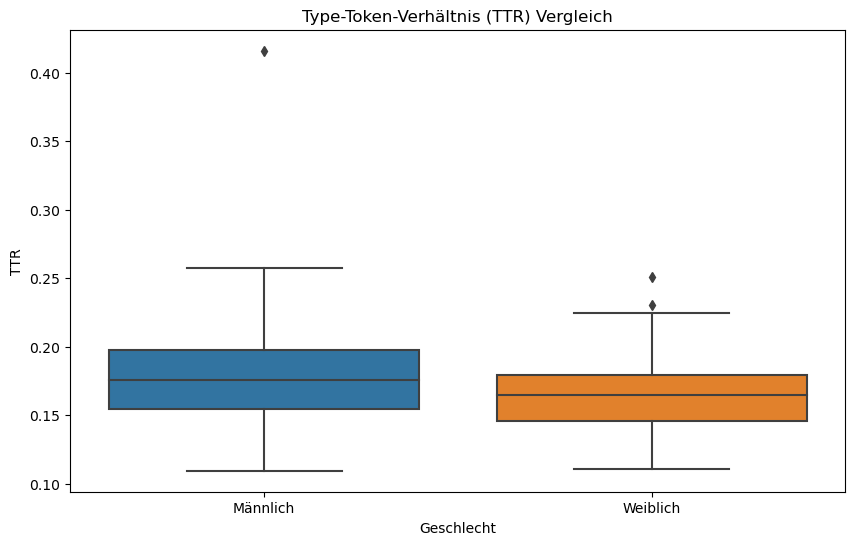

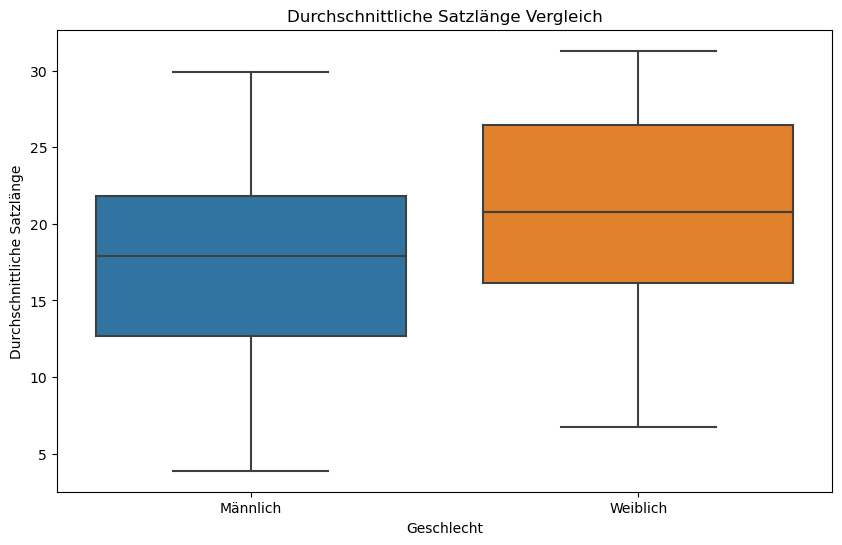

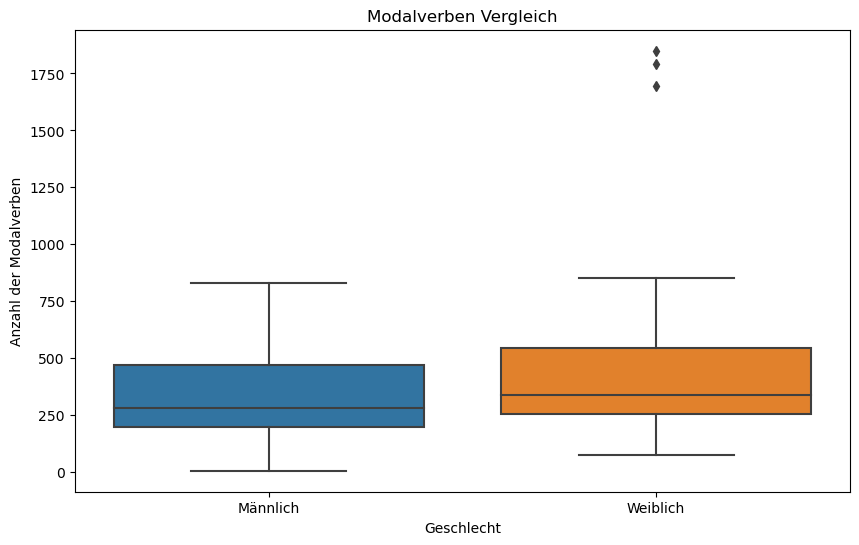

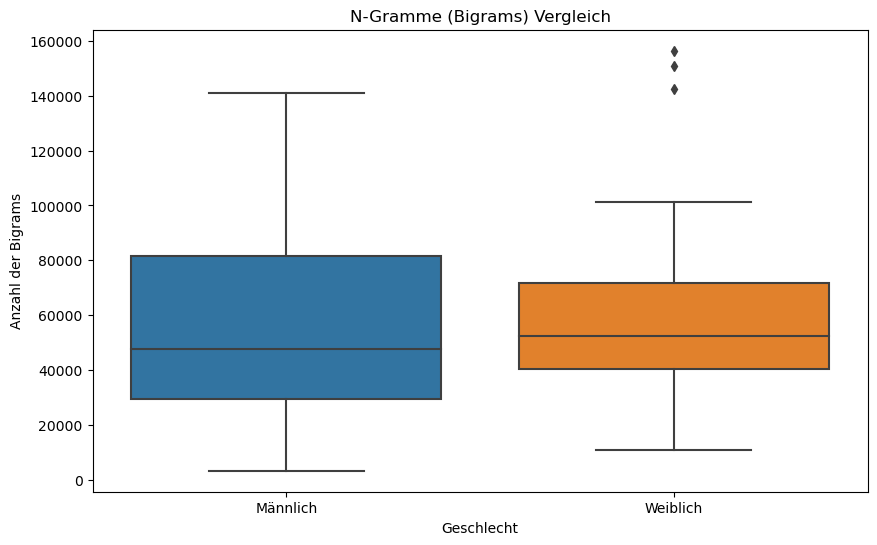

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns


# 1. TTR 
plt.figure(figsize=(10, 6))
sns.boxplot(data=[mann_df['TTR'], weibl_df['TTR']])
plt.title('Type-Token-Verhältnis (TTR) Vergleich')
plt.ylabel('TTR')
plt.xlabel('Geschlecht')
plt.xticks([0, 1], ['Männlich', 'Weiblich'])
plt.show()

# 2. Durchschnittliche Satzlänge
plt.figure(figsize=(10, 6))
sns.boxplot(data=[mann_df['Durchschn. Satzlänge'], weibl_df['Durchschn. Satzlänge']])
plt.title('Durchschnittliche Satzlänge Vergleich')
plt.ylabel('Durchschnittliche Satzlänge')
plt.xlabel('Geschlecht')
plt.xticks([0, 1], ['Männlich', 'Weiblich'])
plt.show()

# 3. Modalverben
plt.figure(figsize=(10, 6))
sns.boxplot(data=[mann_df['Total_Modalverben'], weibl_df['Total_Modalverben']])
plt.title('Modalverben Vergleich')
plt.ylabel('Anzahl der Modalverben')
plt.xlabel('Geschlecht')
plt.xticks([0, 1], ['Männlich', 'Weiblich'])
plt.show()

# 4. N-Gramme
plt.figure(figsize=(10, 6))
sns.boxplot(data=[mann_df['Total_Bigrams'], weibl_df['Total_Bigrams']])
plt.title('N-Gramme (Bigrams) Vergleich')
plt.ylabel('Anzahl der Bigrams')
plt.xlabel('Geschlecht')
plt.xticks([0, 1], ['Männlich', 'Weiblich'])
plt.show()


## Statistische Signifikanz

In [138]:
male_ttr_values = mann_df["TTR"].tolist()
female_ttr_values = weibl_df["TTR"].tolist()

t_stat_ttr, p_value_ttr = ttest_ind(male_ttr_values, female_ttr_values)

print("TTR - T-Wert:", t_stat_ttr)
print("TTR - P-Wert:", p_value_ttr)


TTR - T-Wert: 1.7471077946982774
TTR - P-Wert: 0.08513349798975894


In [137]:
male_avg_sentence_length_values = mann_df["Durchschn. Satzlänge"].tolist()
female_avg_sentence_length_values = weibl_df["Durchschn. Satzlänge"].tolist()

t_stat_avg_sentence_length, p_value_avg_sentence_length = ttest_ind(male_avg_sentence_length_values, female_avg_sentence_length_values)

print("Durchschn. Satzlänge - T-Wert:", t_stat_avg_sentence_length)
print("Durchschn. Satzlänge - P-Wert:", p_value_avg_sentence_length)

Durchschn. Satzlänge - T-Wert: -2.9351030525380044
Durchschn. Satzlänge - P-Wert: 0.004544308698829423


In [136]:
male_modal_values = mann_df["Total_Modalverben"].tolist()
female_modal_values = weibl_df["Total_Modalverben"].tolist()

t_stat, p_value = ttest_ind(male_modal_values, female_modal_values)

print("T-Wert:", t_stat)
print("P-Wert:", p_value)


T-Wert: -1.8980083722404322
P-Wert: 0.06194044873608159


In [139]:
male_bigram_values = mann_df["Total_Bigrams"].tolist()
female_bigram_values = weibl_df["Total_Bigrams"].tolist()

t_stat_bigram, p_value_bigram = ttest_ind(male_bigram_values, female_bigram_values)

print("Total_Bigrams - T-Wert:", t_stat_bigram)
print("Total_Bigrams - P-Wert:", p_value_bigram)


Total_Bigrams - T-Wert: -0.3852959607908586
Total_Bigrams - P-Wert: 0.7012207730715783


---